In [1]:
import pandas as pd
import matplotlib
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab
import math

In [2]:
df_scroll_implicit = pd.read_csv('scroll_implicit.csv')
df_scroll_median = pd.read_csv('scroll_median.csv')
df_scroll_mobile = pd.read_csv('mobile_scroll.csv')

In [3]:
df_scroll_mobile['image_percent'] = df_scroll_mobile['img']/df_scroll_mobile['total']
df_scroll_implicit['image_percent'] = df_scroll_implicit['img']/df_scroll_implicit['total']
df_scroll_median['image_percent'] = df_scroll_median['img']/df_scroll_median['total']

df_scroll_mobile['js_percent'] = df_scroll_mobile['js']/df_scroll_mobile['total']
df_scroll_implicit['js_percent'] = df_scroll_implicit['js']/df_scroll_implicit['total']
df_scroll_median['js_percent'] = df_scroll_median['js']/df_scroll_median['total']

df_scroll_mobile = df_scroll_mobile.sort_values('js_percent', ascending=False)
df_scroll_mobile

,sitename,value,category,js,img,total,image_percent,js_percent
3,alexa.com,56511,Computer,107,24,159,0.150943,0.672956
47,wiley.com,27362,Business,70,16,115,0.139130,0.608696
21,kotaku.com,53728,Games,143,10,283,0.035336,0.505300
22,lifehacker.com,37870,Home,142,8,282,0.028369,0.503546
11,citi.com,13053,Business,46,14,105,0.133333,0.438095
5,att.com,21469,Business,61,9,167,0.053892,0.365269
23,macys.com,30723,Shopping,76,28,215,0.130233,0.353488
40,stubhub.com,6960,Shopping,54,35,153,0.228758,0.352941
18,history.com,18885,Kids and Teens,69,22,207,0.106280,0.333333
44,vimeo.com,11153,Computer,28,5,85,0.058824,0.329412


In [4]:
df_mobile_new=pd.DataFrame(columns=['value_mean','value_std', 'js_category'])

df_scroll_mobile = df_scroll_mobile.sort_values('js_percent')
bins =  np.arange(0,1.0,0.2)
ind = np.digitize(df_scroll_mobile['js_percent'],bins)

df_mobile_img = df_scroll_mobile.groupby(ind, as_index = False).mean()
#print (df_mobile_img)
df_mobile_new['js_category'] = df_mobile_img['js_percent']
for index,row in df_mobile_img.iterrows():
    df_mobile_new.loc[df_mobile_new.js_category == row['js_percent'], 'value_mean']=row['value']
    if row['js_percent'] >= 0 and row['js_percent'] < 0.2:
        df_mobile_new.loc[df_mobile_new.js_category == row['js_percent'], 'js_category'] = "<20%"
    elif row['js_percent'] >= 0.2 and row['js_percent'] < 0.4:
        df_mobile_new.loc[df_mobile_new.js_category == row['js_percent'], 'js_category'] = "20%-40%"
    elif row['js_percent'] >= 0.4 and row['js_percent'] < 0.6:
        df_mobile_new.loc[df_mobile_new.js_category == row['js_percent'], 'js_category'] = "40%-60%"
    elif row['js_percent'] >= 0.6 and row['js_percent'] < 0.8:
        df_mobile_new.loc[df_mobile_new.js_category == row['js_percent'], 'js_category'] = "60%-80%"
    elif row['js_percent'] >= 0.8 and row['js_percent'] <= 1:
        df_mobile_new.loc[df_mobile_new.js_category == row['js_percent'], 'js_category'] = "80%-100%"

df_mobile_img = df_scroll_mobile.groupby(ind, as_index = False).agg(np.std, ddof=1)

for index,row in df_mobile_img.iterrows():
    df_mobile_new.loc[df_mobile_new.index == index,'value_std']=row['value']
df_mobile_new

,value_mean,value_std,js_category
0,33130.8,39516.3,<20%
1,31332.1,26848.8,20%-40%
2,34883.7,20501.3,40%-60%
3,41936.5,20611.5,60%-80%


In [5]:
df_implicit_new=pd.DataFrame(columns=['value_mean','value_std', 'js_category'])

df_scroll_implicit = df_scroll_implicit.sort_values('js_percent')
bins =  np.arange(0,1.0,0.2)
ind = np.digitize(df_scroll_implicit['js_percent'],bins)

df_implicit_img = df_scroll_implicit.groupby(ind, as_index = False).mean()
#print (df_implicit_img)
df_implicit_new['js_category'] = df_implicit_img['js_percent']
for index,row in df_implicit_img.iterrows():
    df_implicit_new.loc[df_implicit_new.js_category == row['js_percent'], 'value_mean']=row['value']
    if row['js_percent'] >= 0 and row['js_percent'] < 0.2:
        df_implicit_new.loc[df_implicit_new.js_category == row['js_percent'], 'js_category'] = "<20%"
    elif row['js_percent'] >= 0.2 and row['js_percent'] < 0.4:
        df_implicit_new.loc[df_implicit_new.js_category == row['js_percent'], 'js_category'] = "20%-40%"
    elif row['js_percent'] >= 0.4 and row['js_percent'] < 0.6:
        df_implicit_new.loc[df_implicit_new.js_category == row['js_percent'], 'js_category'] = "40%-60%"
    elif row['js_percent'] >= 0.6 and row['js_percent'] < 0.8:
        df_implicit_new.loc[df_implicit_new.js_category == row['js_percent'], 'js_category'] = "60%-80%"
    elif row['js_percent'] >= 0.8 and row['js_percent'] <= 1:
        df_implicit_new.loc[df_implicit_new.js_category == row['js_percent'], 'js_category'] = "80%-100%"

df_implicit_img = df_scroll_implicit.groupby(ind, as_index = False).agg(np.std, ddof=1)

for index,row in df_mobile_img.iterrows():
    df_implicit_new.loc[df_implicit_new.index == index,'value_std']=row['value']
df_implicit_new

,value_mean,value_std,js_category
0,10708.3,39516.3,<20%
1,12410.5,26848.8,20%-40%
2,8675.67,20501.3,40%-60%
3,15721,20611.5,60%-80%


In [6]:
df_median_new=pd.DataFrame(columns=['value_mean','value_std', 'js_category'])

df_scroll_median = df_scroll_median.sort_values('js_percent')
#print (df_scroll_median)
bins =  np.arange(0,1.0,0.2)
ind = np.digitize(df_scroll_median['js_percent'],bins)

df_median_img = df_scroll_median.groupby(ind, as_index = False).mean()
#print (df_median_img)

df_median_new['js_category'] = df_median_img['js_percent']
for index,row in df_median_img.iterrows():
    df_median_new.loc[df_median_new.js_category == row['js_percent'], 'value_mean']=row['value']
    if row['js_percent'] >= 0 and row['js_percent'] < 0.2:
        df_median_new.loc[df_median_new.js_category == row['js_percent'], 'js_category'] = "<20%"
    elif row['js_percent'] >= 0.2 and row['js_percent'] < 0.4:
        df_median_new.loc[df_median_new.js_category == row['js_percent'], 'js_category'] = "20%-40%"
    elif row['js_percent'] >= 0.4 and row['js_percent'] < 0.6:
        df_median_new.loc[df_median_new.js_category == row['js_percent'], 'js_category'] = "40%-60%"
    elif row['js_percent'] >= 0.6 and row['js_percent'] < 0.8:
        df_median_new.loc[df_median_new.js_category == row['js_percent'], 'js_category'] = "60%-80%"
    elif row['js_percent'] >= 0.8 and row['js_percent'] <= 1:
        df_median_new.loc[df_median_new.js_category == row['js_percent'], 'js_category'] = "80%-100%"

df_median_img = df_scroll_median.groupby(ind, as_index = False).agg(np.std, ddof=1)

for index,row in df_median_img.iterrows():
    df_median_new.loc[df_median_new.index == index,'value_std']=row['value']
df_median_new

,value_mean,value_std,js_category
0,13784.3,6749.03,<20%
1,15879.5,8396.48,20%-40%
2,13260.8,1199.54,40%-60%
3,24179.2,4503.92,60%-80%


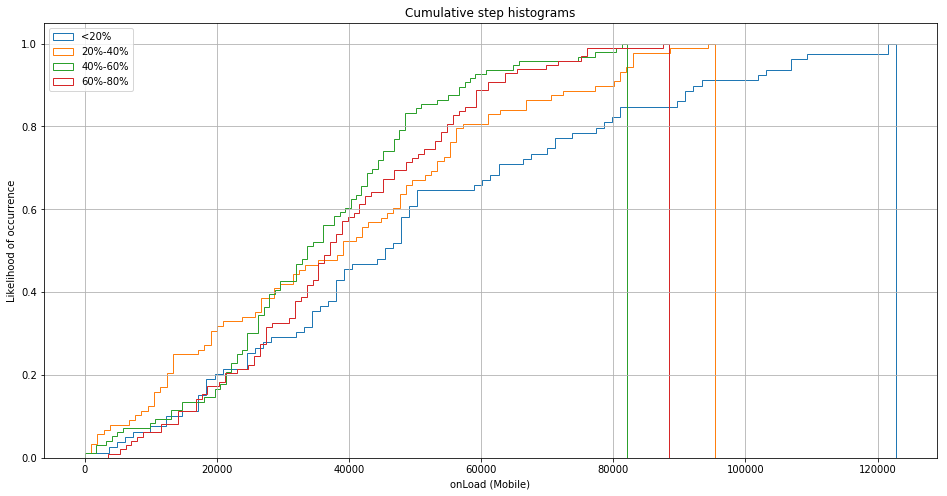

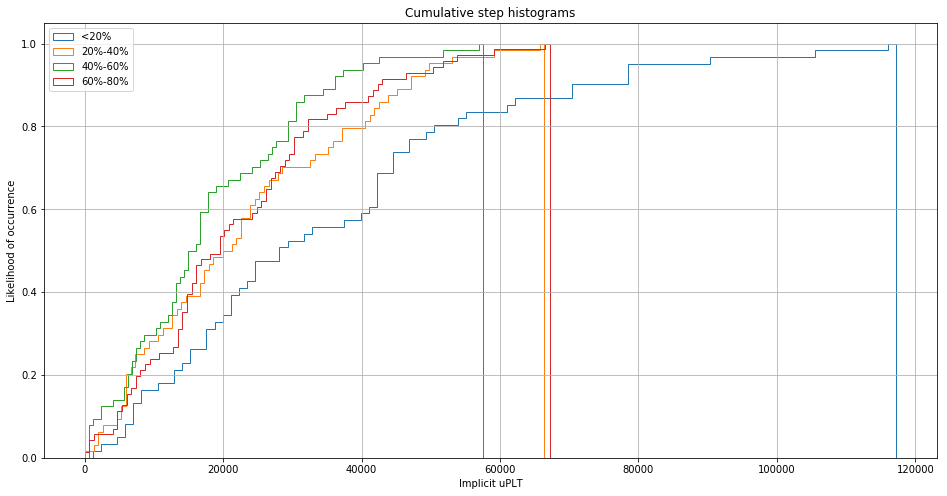

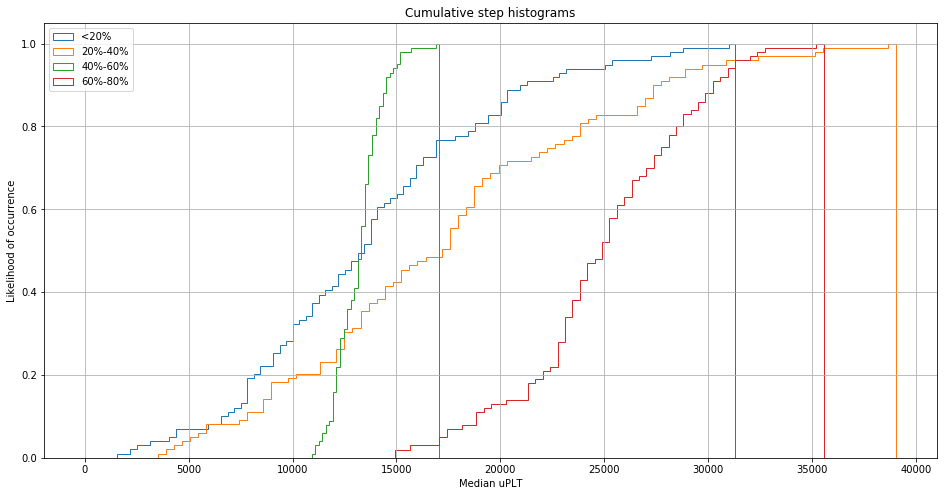

In [7]:
np.random.seed(0)

#mu = 200
#sigma = 25
n_bins = 100

fig, ax = plt.subplots(figsize=(16, 8))
fig2, ax2 = plt.subplots(figsize=(16, 8))
fig3, ax3 = plt.subplots(figsize=(16, 8))

for index,row in df_mobile_new.iterrows():
    if not math.isnan(row['value_std']):
        x = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['js_category'], range=(0, x.max()))
        
for index,row in df_implicit_new.iterrows():
    if not math.isnan(row['value_std']):
        x2 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n2, bins2, patches2 = ax2.hist(x2, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['js_category'], range=(0, x2.max()))
        
for index,row in df_median_new.iterrows():
    if not math.isnan(row['value_std']):
        x3 = np.random.normal(row['value_mean'], row['value_std'], size=100)
        n3, bins3, patches3 = ax3.hist(x3, n_bins, normed=1, histtype='step',
                           cumulative=True, label=row['js_category'], range=(0, x3.max()))


ax.grid(True)
ax.legend(loc='upper left')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('onLoad (Mobile)')
ax.set_ylabel('Likelihood of occurrence')

ax2.grid(True)
ax2.legend(loc='upper left')
ax2.set_title('Cumulative step histograms')
ax2.set_xlabel('Implicit uPLT')
ax2.set_ylabel('Likelihood of occurrence')

ax3.grid(True)
ax3.legend(loc='upper left')
ax3.set_title('Cumulative step histograms')
ax3.set_xlabel('Median uPLT')
ax3.set_ylabel('Likelihood of occurrence')

plt.show()